Let's solve a rubik's cube.

In [434]:
# %pip install torch matplotlib numpy

In [435]:
import numpy as np
import torch
import torch.nn.functional as F

import matplotlib.pyplot as plt
import matplotlib.colors as colors

class Cube:
    def __init__(self):
        self.cube = np.zeros((5,5,5))
        self.cube[0,1:4,1:4] += np.arange(1,10).reshape((3,3))+9*1
        self.cube[-1,1:4,1:4] += np.arange(1,10).reshape((3,3))+9*0
        self.cube[1:4,1:4,0] += np.arange(1,10).reshape((3,3))+9*2
        self.cube[1:4,1:4,-1] += np.arange(1,10).reshape((3,3))+9*3
        self.cube[1:4,0,1:4] += np.arange(1,10).reshape((3,3))+9*4
        self.cube[1:4,-1,1:4] += np.arange(1,10).reshape((3,3))+9*5


    @property
    def as_input(self):
        # return cube as input vector
        flat = self.cube.reshape((5*5*5))
        return torch.tensor(flat[flat != 0],dtype=int)

    @property
    def n(self):
        # null
        return self

    @property
    def f(self):
        # front clockwise
        self.cube[-2] = np.flip(self.cube[-2].T,1)
        self.cube[-1] = np.flip(self.cube[-1].T,1)
        return self

    @property
    def F(self):
        # front counter-clockwise
        self.cube[-2] = np.flip(self.cube[-2].T,0)
        self.cube[-1] = np.flip(self.cube[-1].T,0)
        return self

    @property
    def s(self):
        # mid x-y clockwise
        self.cube[2] = np.flip(self.cube[2].T,0)
        return self

    @property
    def S(self):
        # mid x-y counter-clockwise
        self.cube[2] = np.flip(self.cube[2].T,1)
        return self

    @property
    def b(self):
        # back clockwise
        self.cube[1] = np.flip(self.cube[1].T,0)
        self.cube[0] = np.flip(self.cube[0].T,0)
        return self

    @property
    def B(self):
        # back counter-clockwise
        self.cube[1] = np.flip(self.cube[1].T,1)
        self.cube[0] = np.flip(self.cube[0].T,1)
        return self

    @property
    def l(self):
        # left clockwise
        self.cube[:,:,:2] = np.rot90(self.cube[:,:,:2],axes=(0,1))
        return self

    @property
    def L(self):
        # left counter-clockwise
        self.cube[:,:,:2] = np.rot90(self.cube[:,:,:2],axes=(1,0))
        return self

    @property
    def m(self):
        # mix y-z clockwise
        self.cube[:,:,2] = np.rot90(self.cube[:,:,2],axes=(0,1))
        return self

    @property
    def M(self):
        # mix y-z counter-clockwise
        self.cube[:,:,2] = np.rot90(self.cube[:,:,2],axes=(1,0))
        return self

    @property
    def r(self):
        # right clockwise
        self.cube[:,:,3:] = np.rot90(self.cube[:,:,3:],axes=(0,1))
        return self

    @property
    def R(self):
        # right counter-clockwise
        self.cube[:,:,3:] = np.rot90(self.cube[:,:,3:],axes=(1,0))
        return self

    @property
    def u(self):
        # up clockwise
        self.cube[:,1] = np.flip(self.cube[:,1].T,-1)
        self.cube[:,0] = np.flip(self.cube[:,0].T,-1)
        return self

    @property
    def U(self):
        # up counter-clockwise
        self.cube[:,1] = np.flip(self.cube[:,1].T,0)
        self.cube[:,0] = np.flip(self.cube[:,0].T,0)
        return self

    @property
    def e(self):
        # mid x-z clockwise
        self.cube[:,2] = np.flip(self.cube[:,2].T,-1)
        return self

    @property
    def E(self):
        # mid x-z counter-clockwise
        self.cube[:,2] = np.flip(self.cube[:,2].T,0)
        return self

    @property
    def d(self):
        # down clockwise
        self.cube[:,-2] = np.flip(self.cube[:,-2].T,0)
        self.cube[:,-1] = np.flip(self.cube[:,-1].T,0)
        return self

    @property
    def D(self):
        # down counter-clockwise
        self.cube[:,-2] = np.flip(self.cube[:,-2].T,-1)
        self.cube[:,-1] = np.flip(self.cube[:,-1].T,-1)
        return self

    @property
    def train_set(self):
        # return all cube moves and current state as target
        moves = []
        moves.append(self.n.as_input)
        moves.append(self.f.as_input);self.F
        moves.append(self.F.as_input);self.f
        moves.append(self.s.as_input);self.S
        moves.append(self.S.as_input);self.s
        moves.append(self.b.as_input);self.B
        moves.append(self.B.as_input);self.b
        moves.append(self.l.as_input);self.L
        moves.append(self.L.as_input);self.l
        moves.append(self.m.as_input);self.M
        moves.append(self.M.as_input);self.m
        moves.append(self.r.as_input);self.R
        moves.append(self.R.as_input);self.r
        moves.append(self.u.as_input);self.U
        moves.append(self.U.as_input);self.u
        moves.append(self.e.as_input);self.E
        moves.append(self.E.as_input);self.e
        moves.append(self.d.as_input);self.D
        moves.append(self.D.as_input);self.d
        return torch.stack(moves), torch.stack([self.as_input for _ in range(19)])



In [469]:
# helper
def cat(x):
    return torch.concat([x[-1][0],x[-1][1],x[-2][1]],dim=1)

def cubeStep(cube):
    ts.append(cube.train_set)
    ips.append(cat(ts))
    tgs.append(ts[-1][1])


C = Cube()
ts = [(C.train_set[1],C.train_set[1])]
ips = []
tgs = []

cubeStep(C)
for _ in range(110):
    cubeStep(C.r)
    cubeStep(C.u)
    cubeStep(C.L)
    cubeStep(C.d)

cubeStep(C)
for _ in range(110):
    cubeStep(C.m)
    cubeStep(C.r)
    cubeStep(C.M)
    cubeStep(C.d)
    cubeStep(C.l)
    cubeStep(C.u)
    cubeStep(C.D)

C = Cube()
cubeStep(C)
for _ in range(110):
    cubeStep(C.R)
    cubeStep(C.U)

C = Cube()
cubeStep(C)
for _ in range(6):
    cubeStep(C.R)
    cubeStep(C.d)
    cubeStep(C.r)
    cubeStep(C.D)

C = Cube()
cubeStep(C)
for _ in range(200):
    cubeStep(C.R)
    cubeStep(C.d)
    cubeStep(C.f)
    cubeStep(C.l)
    cubeStep(C.u)
    cubeStep(C.b)
    cubeStep(C.m)
    cubeStep(C.r)
    cubeStep(C.s)
    cubeStep(C.U)
    cubeStep(C.D)

C = Cube()
cubeStep(C)
for _ in range(200):
    cubeStep(C.s)
    cubeStep(C.d)
    cubeStep(C.m)
    cubeStep(C.u)
    cubeStep(C.D)
    cubeStep(C.U)
    cubeStep(C.r)
    cubeStep(C.b)
    cubeStep(C.l)
    cubeStep(C.R)
    cubeStep(C.f)


inputs = torch.concat(ips,dim=0) - 1
targets = torch.concat(tgs,dim=0) - 1

inputs.shape, targets.shape

(torch.Size([111340, 162]), torch.Size([111340, 54]))

In [437]:
B, T, Co = 32, 54, 54

In [438]:
# create a random torch tensor with shape (54,54)
tokEmbs = torch.nn.Embedding(54,54)
posEmbs = torch.nn.Embedding(162,54)
tokEmbs,posEmbs

(Embedding(54, 54), Embedding(162, 54))

In [470]:
inputs = tokEmbs(inputs)

inputs.shape, targets.shape

(torch.Size([111340, 162, 54]), torch.Size([111340, 54]))

In [486]:
multihead_attn = torch.nn.MultiheadAttention(Co, 3, batch_first=True)
lin = torch.nn.Linear(3*T*Co,T*Co, bias=False)
lin2 = torch.nn.Linear(T*Co,T*Co*3, bias=False)
lin3 = torch.nn.Linear(T*Co*3,T*Co, bias=False)
optimizer = torch.optim.Adam(list(lin.parameters())+list(multihead_attn.parameters()))
lossi = []

In [ ]:
for _ in range(30000000):
    
    optimizer.zero_grad()
    batch = torch.randint(0, inputs.shape[0], (32,))

    att = inputs[batch] + posEmbs(torch.arange(T*3))
    attn_output, attn_output_weights = multihead_attn(att, att, att)
    logits = torch.nn.ReLU()(lin((att+attn_output).view(batch.shape[0],162*54)))
    logits2 = (att+lin2(logits).view(batch.shape[0], 162, 54)).view(batch.shape[0],162*54)
    logits3 = lin3(logits2).view(batch.shape[0], 54, 54)

    loss = F.cross_entropy(logits3,torch.eye(T)[targets[batch]])

    loss.backward(retain_graph=True)
    optimizer.step()
    lossi.append(loss.item())

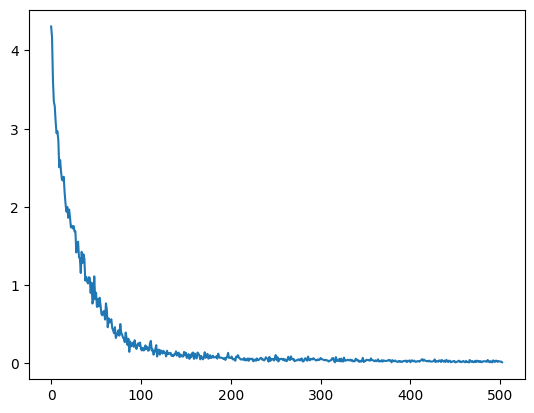

In [568]:
plt.plot(lossi)

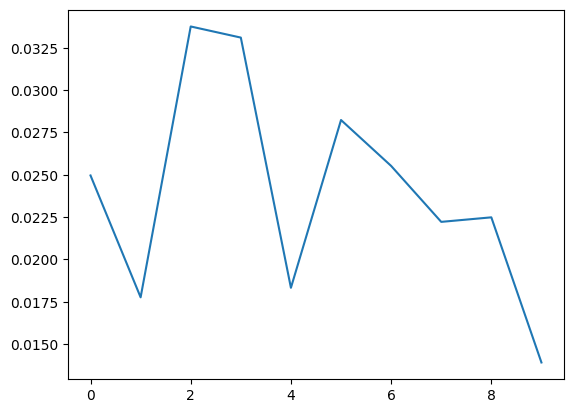

In [569]:
plt.plot(lossi[-10:])

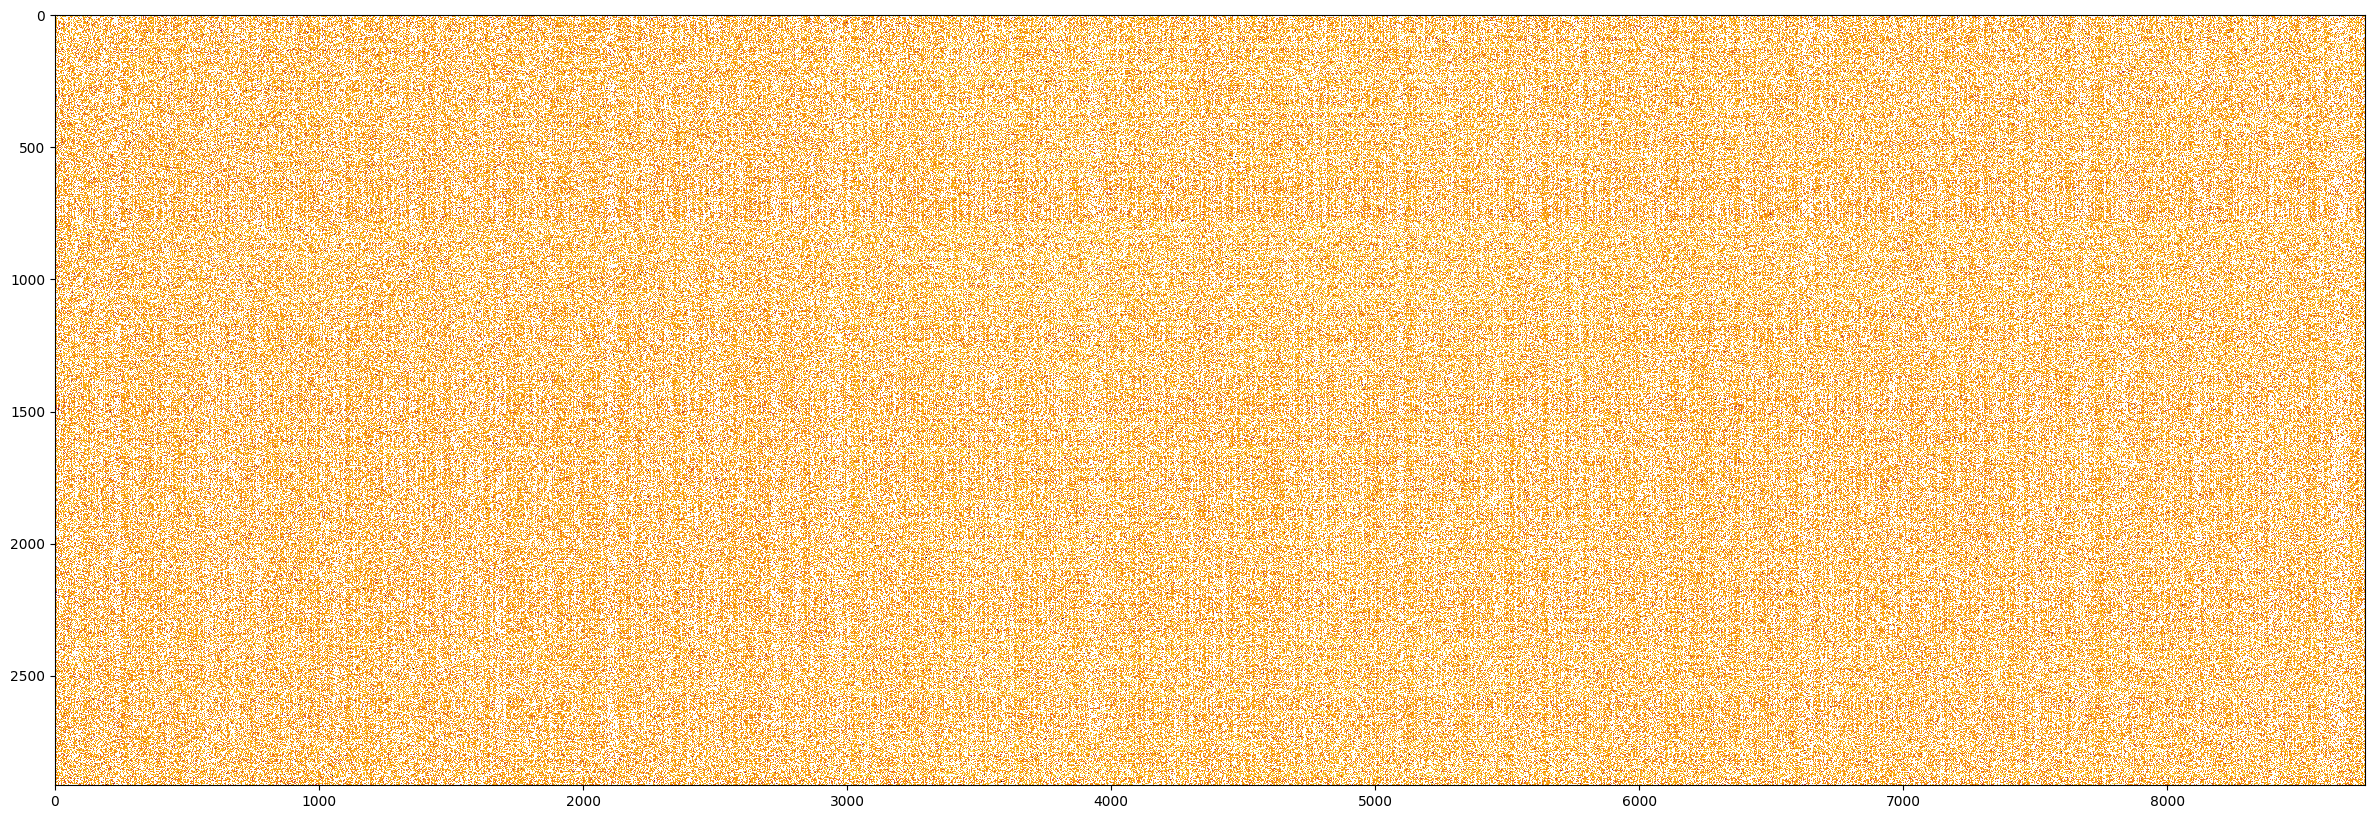

In [564]:
d = list(lin.parameters())[0].detach().numpy()
plt.figure(figsize=(30,10))
plt.imshow(d, norm=colors.LogNorm(vmin=d.min(), vmax=d.max()), cmap='inferno', interpolation='nearest')
plt.show()

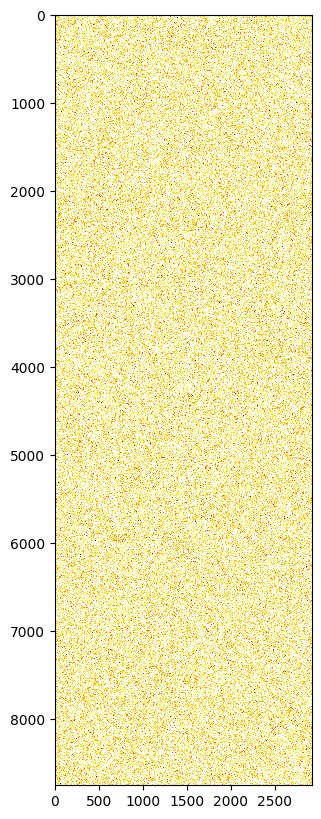

In [565]:
d = list(lin2.parameters())[0].detach().numpy()
plt.figure(figsize=(30,10))
plt.imshow(d, norm=colors.LogNorm(vmin=d.min(), vmax=d.max()), cmap='inferno', interpolation='nearest')
plt.show()

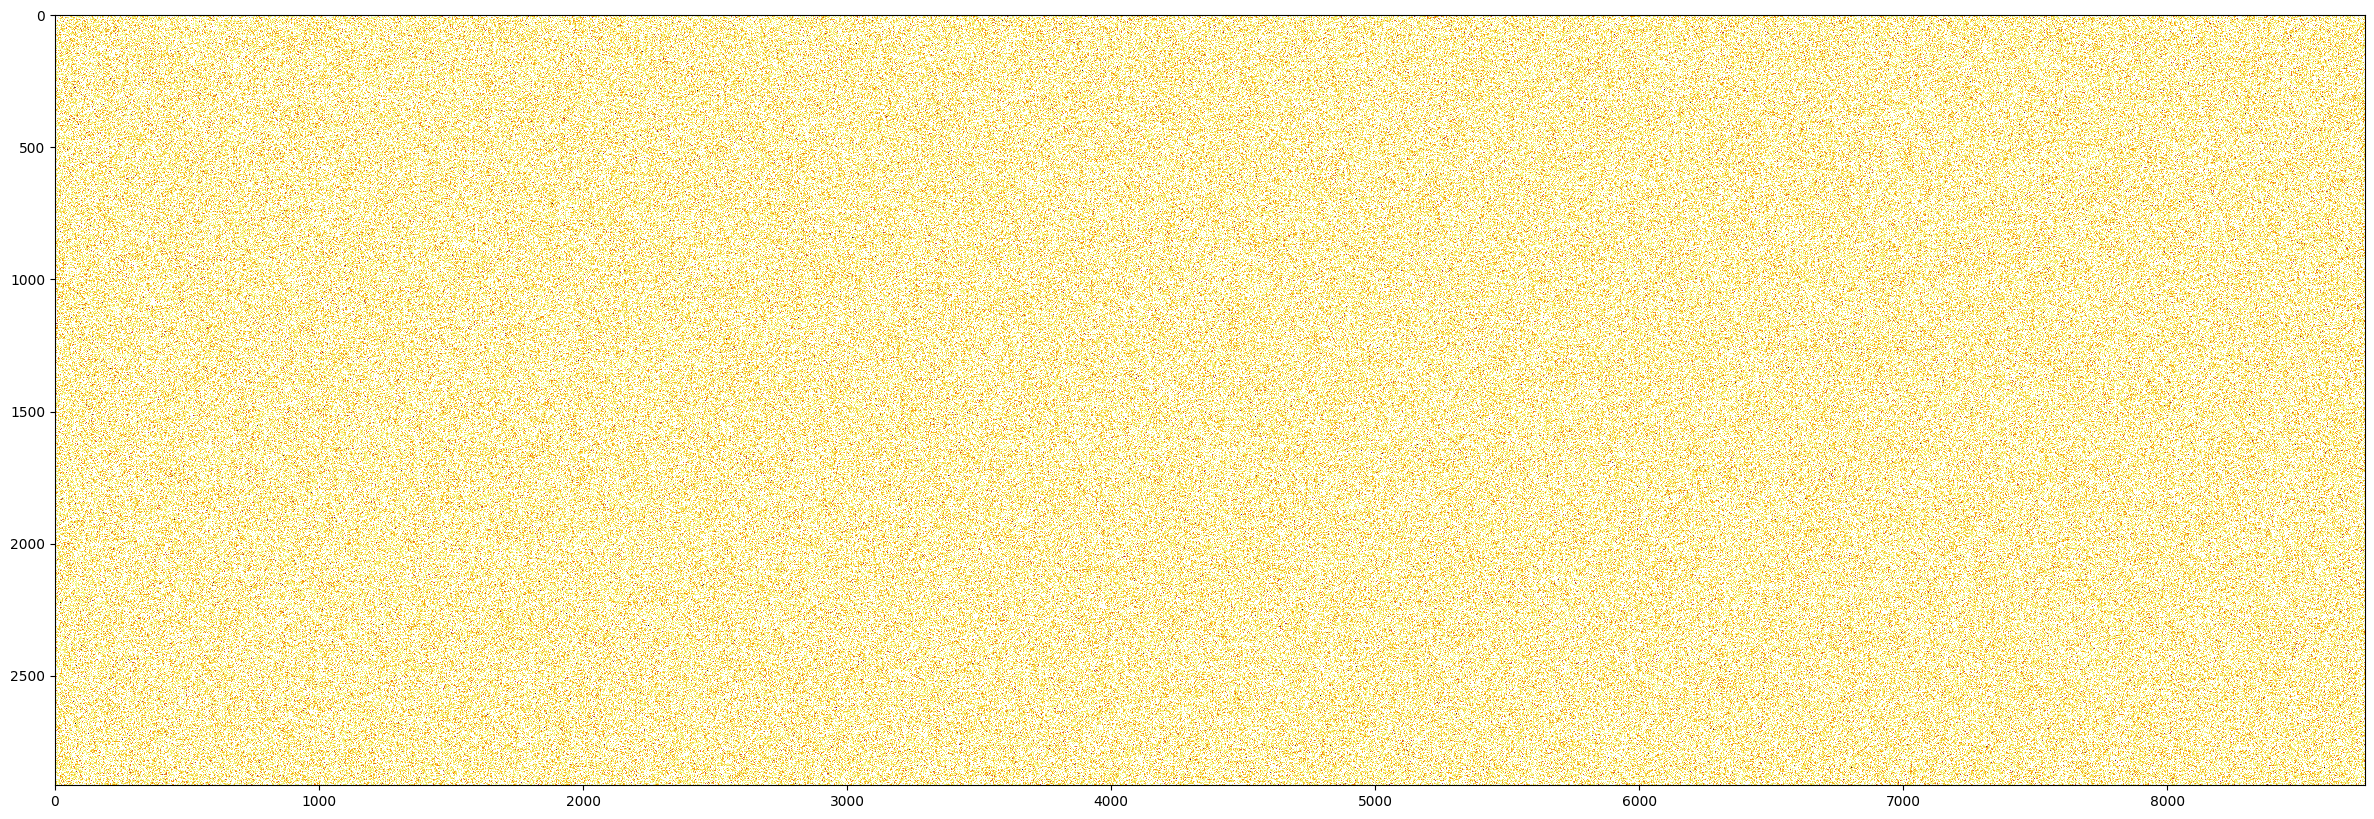

In [566]:
d = list(lin3.parameters())[0].detach().numpy()
plt.figure(figsize=(30,10))
plt.imshow(d, norm=colors.LogNorm(vmin=d.min(), vmax=d.max()), cmap='inferno', interpolation='nearest')
plt.show()

In [515]:
torch.argmax(logits3[0], dim=1)

tensor([18, 25, 11, 12, 40, 14,  8, 48, 44,  9,  3, 38, 36, 27, 19, 28, 35,  2,
        53, 23, 33, 30, 22, 32, 41, 50, 13,  4, 16,  5, 46, 31, 34, 24, 39, 17,
         0, 47, 52, 10, 51, 20,  6,  1, 45, 42, 21, 29,  7, 49, 37, 26, 43, 15])

In [516]:
targets[batch][0]

tensor([18, 25, 11, 12, 40, 14,  8, 48, 44,  9,  3, 38, 36, 27, 19, 28, 35,  2,
        53, 23, 33, 30, 22, 32, 41, 50, 13,  4, 16,  5, 46, 31, 34, 24, 39, 17,
         0, 47, 52, 10, 51, 20,  6,  1, 45, 42, 21, 29,  7, 49, 37, 26, 43, 15])

In [517]:
torch.argmax(logits3[0], dim=1) - targets[batch][0]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0])

In [561]:
newC = Cube()
testinput = torch.concat((newC.r.u.f.as_input,newC.r.u.as_input,newC.r.as_input)).view(1,-1)
testinput = tokEmbs(testinput-1)
newC = Cube()

torch.Size([1, 162, 54])

In [562]:
att = testinput + posEmbs(torch.arange(T*3))
attn_output, attn_output_weights = multihead_attn(att, att, att)
logits = torch.nn.ReLU()(lin((att+attn_output).view(testinput.shape[0],162*54)))
logits2 = (att+lin2(logits).view(testinput.shape[0], 162, 54)).view(testinput.shape[0],162*54)
logits3 = lin3(logits2).view(testinput.shape[0], 54, 54)


In [563]:
torch.argmax(logits3[0], dim=1) - newC.as_input

tensor([ 39,   1, -12,  -1,  -1, -10,  -1,  -1,  29, -11, -23,   3,  14,  12,
         -1,   5,  -1, -13, -42,  -1,  -8, -15,  -1,  -5,  -1, -24,  -1,  -1,
         -1, -11,  -1,  -1, -44, -25,   5, -28,  11,  15,  -1, -25,  -1, -25,
         -1,  -1, -27,   8,  30,  32,  -1,  -1,  31,  35,  -1,  29])

tensor(0)